In [35]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
%matplotlib inline

In [4]:
import nashpy as nash

In [5]:
def dx(x,t,A):   #criar a derivada
    f=np.dot (A,x) #f em cada momento do tempo
    phi=np.dot(f,x)
    return x*(f-phi)

In [6]:
t=np.linspace(0,100,1000)
A=np.array([[4,3,2],[2,1,5],[6,0,3]])
xs= odeint(func= dx, y0=[1/3,1/3,1/3], t=t, args=(A,)) # criar todos os x em relação ao tempo  y0=onde a população começa

In [7]:
xs

array([[0.33333333, 0.33333333, 0.33333333],
       [0.33672616, 0.32599158, 0.33728226],
       [0.33947165, 0.31883899, 0.34168936],
       ...,
       [0.28000012, 0.32000044, 0.39999945],
       [0.28000016, 0.3200004 , 0.39999944],
       [0.2800002 , 0.32000036, 0.39999945]])

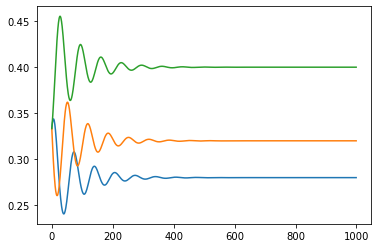

In [8]:
plt.plot(xs)

In [9]:
#war=np.array([[558.23, 558.23],[583.37, 581.28]]) ## 50 dólares o barril
war=np.array([[1281.59, 1281.59],[1282.32, 1278.39]])  ##72 dólares o barril
#war=np.array([[1557.41, 1557.41],[1557.41, 1553.52]]) ## 80 dólare o barril

In [10]:
epsilon = 10 ** -1
xs= odeint(func= dx, y0=[1-epsilon, epsilon], t=t, args=(war,)) # criar todos os x em relação ao tempo  y0=onde a população começa

In [11]:
xs= odeint(func= dx, y0=[1-epsilon, epsilon], t=t, args=(war,))

In [12]:
xs= odeint(func= dx, y0=[1-epsilon, epsilon], t=t, args=(war,))

In [13]:
xs[-1]

array([0.81424936, 0.18575064])

In [14]:
game = nash.Game(war, war.transpose())
list(game.support_enumeration())

[(array([1., 0.]), array([0., 1.])),
 (array([0., 1.]), array([1., 0.])),
 (array([0.81424936, 0.18575064]), array([0.81424936, 0.18575064]))]

In [15]:
xs

array([[0.9       , 0.1       ],
       [0.8969778 , 0.1030222 ],
       [0.89398715, 0.10601285],
       ...,
       [0.81424936, 0.18575064],
       [0.81424936, 0.18575064],
       [0.81424936, 0.18575064]])

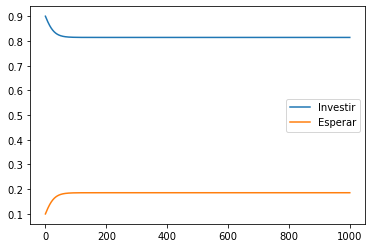

In [16]:
plt.plot(xs)
plt.legend(['Investir','Esperar'])

[]

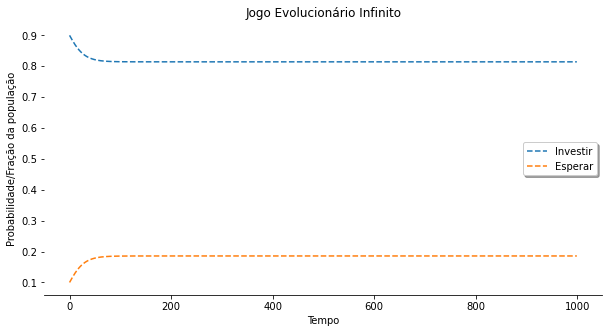

In [17]:
#####Figuras #####
fig,ax = plt.subplots(1,1, figsize=(10,5))
sns.despine(left=True)


ax.plot(xs, ls='--' )


ax.legend(['Investir','Esperar'], loc='center right', shadow=True)
ax.set_ylabel('Probabilidade/Fração da população')
ax.set_xlabel('Tempo')
ax.set_title('Jogo Evolucionário Infinito')
plt.plot()

[]

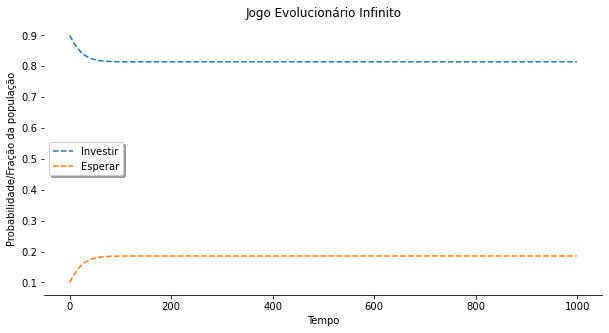

In [18]:
#####Figuras#####
fig,ax = plt.subplots(1,1, figsize=(10,5))
sns.despine(left=True)


ax.plot(xs, ls='--' )


ax.legend(['Investir','Esperar'], loc='center left', shadow=True)
ax.set_ylabel('Probabilidade/Fração da população')
ax.set_xlabel('Tempo')
ax.set_title('Jogo Evolucionário Infinito')
#ax.set_xlim(right=72)
#ax.set_xlim(left=71)

#ax.set_ylim(top=1300)
#ax.set_ylim(bottom=1250)
#ax2.set_title('Opção de Investir em função do Preço')

plt.plot()

[]

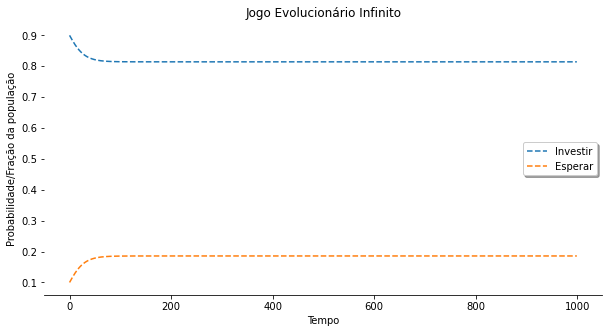

In [19]:
#####Figuras #####
fig,ax = plt.subplots(1,1, figsize=(10,5))
sns.despine(left=True)


ax.plot(xs, ls='--' )


ax.legend(['Investir','Esperar'], loc='center right', shadow=True)
ax.set_ylabel('Probabilidade/Fração da população')
ax.set_xlabel('Tempo')
ax.set_title('Jogo Evolucionário Infinito')
plt.plot()

In [20]:
def dxdy(entrada,t,A,B):#criar a derivada
    x=[entrada[0],1-entrada[0]]
    y=[entrada[1],1-entrada[1]]
    x_v=np.array(x)
    x_v=x_v.reshape((1,2))
    ###parametro do dxtt
    fid=np.dot(A,y)[0]
    fed=np.dot(A,y)[1]
    ###parametro do dytt
    #print(B,x_v, x_v.shape)
    fih=np.dot(x_v,B)[0,0]
    feh=np.dot(x_v,B)[0,1]
    
    
    #print(fb)
    dxdt=x[0]*(1-x[1])*(fid-fed)
    dydt=y[0]*(1-y[1])*(fih-feh)
    return [dxdt, dydt]

In [21]:
x0=[1-2*epsilon,1-2*epsilon]


In [22]:
x0

[0.8, 0.8]

In [23]:
A=np.array([[1281.59, 1281.59],[1282.32, 1278.39]])
B=A.transpose()
    

In [24]:
dxdy([0.5,0.5],10, A,B)[0]

0.308749999999975

In [25]:
np.linalg.norm(np.array(dxdy([0.5,0.5],10, A,B)))

0.43663843738265773

In [26]:
np.linalg.

SyntaxError: invalid syntax (<ipython-input-26-09143f185499>, line 1)

In [27]:
xs=odeint(dxdy,x0,t,args=(A,B))

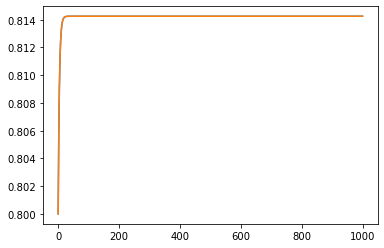

In [28]:
plt.plot(xs)

In [29]:
X = np.arange(0, 1, .01)
Y = np.arange(0, 1, .01)
#U, V = np.meshgrid(X, Y)

In [30]:
U=np.zeros((len(X),len(Y)))
V=np.zeros((len(X),len(Y)))

for j in range(len(Y)):
    for i in range(len(X)):
        U[i,j]=dxdy([X[i],Y[j]],10, A,B)[0]
        V[i,j]=dxdy([X[i],Y[j]],10, A,B)[1]
        


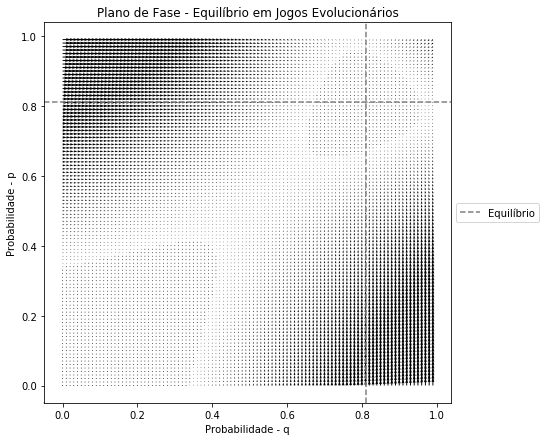

In [209]:


fig, ax = plt.subplots(figsize=(7.3,7))
q = ax.quiver(X, Y, U, V)
ax.quiverkey(q, X=0, Y=0, U=0,label='', labelpos='E')
ax.axhline(0.81, linestyle='--', color='grey')
ax.axvline(0.81, linestyle='--', color='grey')
ax.set_title('Plano de Fase - Equilíbrio em Jogos Evolucionários')
ax.set_xlabel('Probabilidade - q')
ax.set_ylabel('Probabilidade - p')
ax.legend(['Equilíbrio',],loc='center left', bbox_to_anchor=(1, 0.5))


plt.show()

In [230]:
C=np.array([[1212.64,1212.64], [1213.05,1209.61]])

In [231]:
D=np.array([[1537.10,1538.75],[1537.10,1533.27]])

In [232]:
U=np.zeros((len(X),len(Y)))
V=np.zeros((len(X),len(Y)))

for j in range(len(Y)):
    for i in range(len(X)):
        U[i,j]=dxdy([X[i],Y[j]],10, C,D)[0]
        V[i,j]=dxdy([X[i],Y[j]],10, C,D)[1]
        

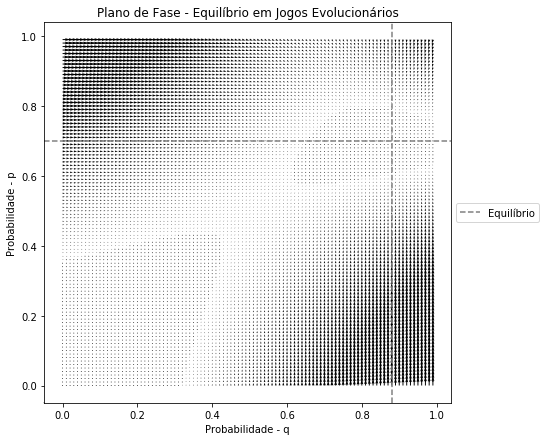

In [233]:


fig, ax = plt.subplots(figsize=(7.3,7))
q = ax.quiver(X, Y, U, V)
ax.quiverkey(q, X=0, Y=0, U=0,label='', labelpos='E')
ax.axhline(0.6989,linestyle='--', color='grey')
ax.axvline(0.8808,linestyle='--', color='grey')
ax.set_title('Plano de Fase - Equilíbrio em Jogos Evolucionários')
ax.set_xlabel('Probabilidade - q')
ax.set_ylabel('Probabilidade - p')
ax.legend(['Equilíbrio',],loc='center left', bbox_to_anchor=(1, 0.5))


plt.show()

In [214]:
E=np.array([[558.23, 558.23],[583.37, 581.28]]) ## 50 dólares o barril
F=E.transpose()

In [215]:
U=np.zeros((len(X),len(Y)))
V=np.zeros((len(X),len(Y)))

for j in range(len(Y)):
    for i in range(len(X)):
        U[i,j]=dxdy([X[i],Y[j]],10, E,F)[0]
        V[i,j]=dxdy([X[i],Y[j]],10, E,F)[1]
        


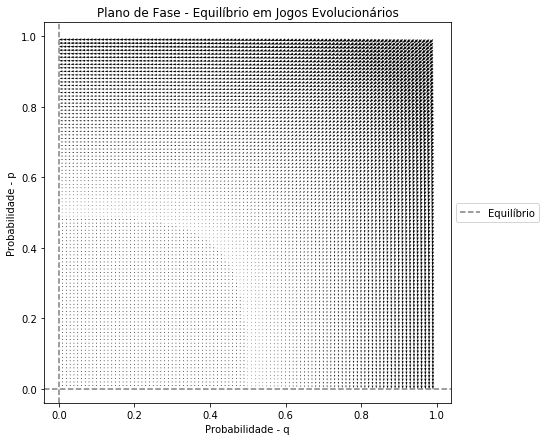

In [216]:


fig, ax = plt.subplots(figsize=(7.3,7))
q = ax.quiver(X[1:], Y[1:], U[1:,:-1], V[1:,:-1])
ax.quiverkey(q, X=0, Y=0, U=0,label='', labelpos='E')
ax.axhline(0,linestyle='--', color='grey')
ax.axvline(0,linestyle='--', color='grey')
ax.set_title('Plano de Fase - Equilíbrio em Jogos Evolucionários')
ax.set_xlabel('Probabilidade - q')
ax.set_ylabel('Probabilidade - p')
ax.legend(['Equilíbrio',],loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [217]:
U[1,:-1]

array([-0.002305  , -0.00230709, -0.00230918, -0.00231127, -0.00231336,
       -0.00231545, -0.00231754, -0.00231963, -0.00232172, -0.00232381,
       -0.0023259 , -0.00232799, -0.00233008, -0.00233217, -0.00233426,
       -0.00233635, -0.00233844, -0.00234053, -0.00234262, -0.00234471,
       -0.0023468 , -0.00234889, -0.00235098, -0.00235307, -0.00235516,
       -0.00235725, -0.00235934, -0.00236143, -0.00236352, -0.00236561,
       -0.0023677 , -0.00236979, -0.00237188, -0.00237397, -0.00237606,
       -0.00237815, -0.00238024, -0.00238233, -0.00238442, -0.00238651,
       -0.0023886 , -0.00239069, -0.00239278, -0.00239487, -0.00239696,
       -0.00239905, -0.00240114, -0.00240323, -0.00240532, -0.00240741,
       -0.0024095 , -0.00241159, -0.00241368, -0.00241577, -0.00241786,
       -0.00241995, -0.00242204, -0.00242413, -0.00242622, -0.00242831,
       -0.0024304 , -0.00243249, -0.00243458, -0.00243667, -0.00243876,
       -0.00244085, -0.00244294, -0.00244503, -0.00244712, -0.00

In [218]:
U.shape

(100, 100)

In [219]:
E=np.array([[1557.41, 1557.41],[1557.41, 1553.52]]) ## 80 dólare o barril
F=E.transpose()

In [220]:
U=np.zeros((len(X),len(Y)))
V=np.zeros((len(X),len(Y)))

for j in range(len(Y)):
    for i in range(len(X)):
        U[i,j]=dxdy([X[i],Y[j]],10, E,F)[0]
        V[i,j]=dxdy([X[i],Y[j]],10, E,F)[1]
        


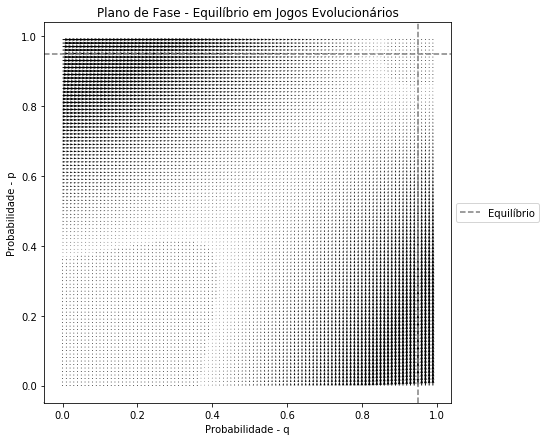

In [221]:
fig, ax = plt.subplots(figsize=(7.3,7))
q = ax.quiver(X, Y, U, V)
ax.quiverkey(q, X=0, Y=0, U=0,label='', labelpos='E')
ax.axhline(0.95,linestyle='--', color='grey')
ax.axvline(.95,linestyle='--', color='grey')
ax.set_title('Plano de Fase - Equilíbrio em Jogos Evolucionários')
ax.set_xlabel('Probabilidade - q')
ax.set_ylabel('Probabilidade - p')
ax.legend(['Equilíbrio',],loc='center left', bbox_to_anchor=(1, 0.5))


plt.show()

In [222]:
J=np.array([[1912.80,1912.80], [1913.80,1911.41]])

In [223]:
K=np.array([[1217.55,1219.07], [1217.55,1214.51]])

In [224]:
U=np.zeros((len(X),len(Y)))
V=np.zeros((len(X),len(Y)))

for j in range(len(Y)):
    for i in range(len(X)):
        U[i,j]=dxdy([X[i],Y[j]],10, J,K)[0]
        V[i,j]=dxdy([X[i],Y[j]],10, J,K)[1]
        


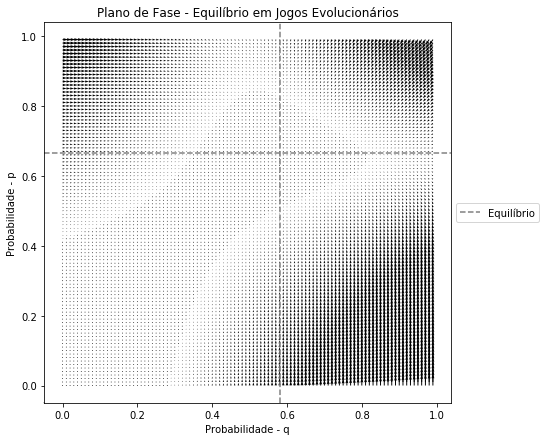

In [225]:
fig, ax = plt.subplots(figsize=(7.3,7))
q = ax.quiver(X, Y, U,V)
ax.quiverkey(q, X=0, Y=0, U=0,label='', labelpos='E')
ax.axhline(0.6666,linestyle='--', color='grey')
ax.axvline(.5815,linestyle='--', color='grey')
ax.set_title('Plano de Fase - Equilíbrio em Jogos Evolucionários')
ax.set_xlabel('Probabilidade - q')
ax.set_ylabel('Probabilidade - p')
ax.legend(['Equilíbrio',],loc='center left', bbox_to_anchor=(1, 0.5))


plt.show()

In [31]:
###########################
###Jogos Repitidos- Guerra de Atrito ###########\


In [152]:
v_m=70
c_m=20
v=50
c=10

p=v/(v+c)
p_fracasso=(1-2*p*(1-p))


p_v_m=v_m/(v_m+c)
p_c_m=v/(v+c_m)

In [153]:
#Examplo de df probabilidade de continuidade
df = pd.DataFrame(list(range(21)), columns = ['Tempo'])
df['Continuacao'] = df['Tempo'].apply(lambda x: p**(2*(x+1)))
df['Cont_v_maior'] = df['Tempo'].apply(lambda x: p_v_m**(2*(x+1)))
df['Cont_c_maior'] = df['Tempo'].apply(lambda x: p_c_m**(2*(x+1)))
#df['$50 Call Profit'] = df['$50 Call Payoff'] - 5
df = df.set_index('Tempo')
print(df)

       Continuacao  Cont_v_maior  Cont_c_maior
Tempo                                         
0         0.694444      0.765625  5.102041e-01
1         0.482253      0.586182  2.603082e-01
2         0.334898      0.448795  1.328103e-01
3         0.232568      0.343609  6.776036e-02
4         0.161506      0.263076  3.457161e-02
5         0.112157      0.201417  1.763858e-02
6         0.077887      0.154210  8.999275e-03
7         0.054088      0.118067  4.591467e-03
8         0.037561      0.090395  2.342585e-03
9         0.026084      0.069209  1.195196e-03
10        0.018114      0.052988  6.097941e-04
11        0.012579      0.040569  3.111194e-04
12        0.008735      0.031061  1.587344e-04
13        0.006066      0.023781  8.098694e-05
14        0.004213      0.018207  4.131987e-05
15        0.002926      0.013940  2.108157e-05
16        0.002032      0.010673  1.075590e-05
17        0.001411      0.008171  5.487704e-06
18        0.000980      0.006256  2.799849e-06
19        0.0

<AxesSubplot:xlabel='Tempo'>

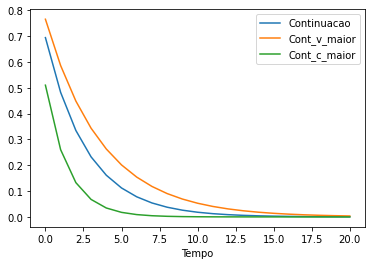

In [154]:
df.plot()

[]

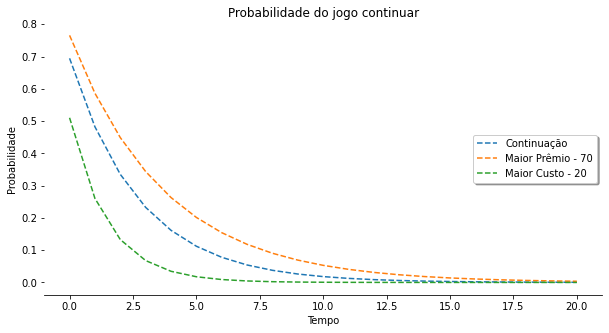

In [155]:
#####Figuras #####
fig,ax = plt.subplots(1,1, figsize=(10,5))
sns.despine(left=True)


ax.plot(df, ls='--' )


ax.legend(['Continuação','Maior Prêmio - 70', 'Maior Custo - 20'], loc='center right', shadow=True)
ax.set_ylabel('Probabilidade')
ax.set_xlabel('Tempo')
ax.set_title('Probabilidade do jogo continuar')
plt.plot()

In [156]:
#Examplo de df probabilidade de continuidade e fracasso
df1 = pd.DataFrame(list(range(21)), columns = ['Tempo'])
df1['Continuacao'] = df1['Tempo'].apply(lambda x: p**(2*(x+1)))
df1['Fracasso'] = df1['Continuacao'].shift(1)*p_fracasso
df1['Fracasso'].loc[0]=p_fracasso
#df['$50 Call Profit'] = df['$50 Call Payoff'] - 5
df1 = df1.set_index('Tempo')
print(df1)

       Continuacao  Fracasso
Tempo                       
0         0.694444  0.722222
1         0.482253  0.501543
2         0.334898  0.348294
3         0.232568  0.241871
4         0.161506  0.167966
5         0.112157  0.116643
6         0.077887  0.081002
7         0.054088  0.056251
8         0.037561  0.039063
9         0.026084  0.027127
10        0.018114  0.018838
11        0.012579  0.013082
12        0.008735  0.009085
13        0.006066  0.006309
14        0.004213  0.004381
15        0.002926  0.003043
16        0.002032  0.002113
17        0.001411  0.001467
18        0.000980  0.001019
19        0.000680  0.000708
20        0.000472  0.000491


C:\Users\LG\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


<AxesSubplot:xlabel='Tempo'>

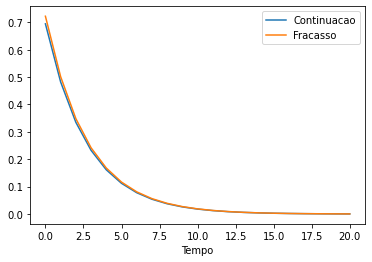

In [157]:
df1.plot()

[]

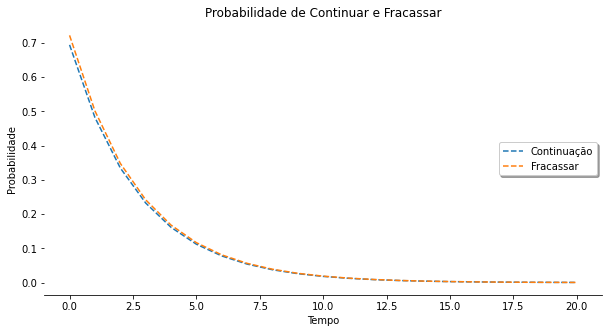

In [158]:
#####Figuras #####
fig,ax = plt.subplots(1,1, figsize=(10,5))
sns.despine(left=True)


ax.plot(df1, ls='--' )


ax.legend(['Continuação','Fracassar'], loc='center right', shadow=True)
ax.set_ylabel('Probabilidade')
ax.set_xlabel('Tempo')
ax.set_title('Probabilidade de Continuar e Fracassar')
plt.plot()

In [159]:
#Examplo de df custo esperado
df2 = pd.DataFrame(list(range(21)), columns = ['Tempo'])
df2['Continuacao'] = df2['Tempo'].apply(lambda x: p**(2*(x+1)))
df2['Custo_esperado']= df2['Tempo'].apply(lambda x: (1+x)*c*p**(2*(x+1)))
df2['Custo_esperado_c_maior']= df2['Tempo'].apply(lambda x: (1+x)*c_m*p_c_m**(2*(x+1)))
df2['Custo_esperado_v_maior']= df2['Tempo'].apply(lambda x: (1+x)*c*p_v_m**(2*(x+1)))

#df2['Custo_esperado']=df2['Custo_esperado'].rolling(1).sum()
df2 = df2.set_index('Tempo')

for i in range(df2.shape[0]-1):
    #print(df2.Custo_esperado.loc[i], df2.Custo_esperado.loc[1+i])
    df2.Custo_esperado.loc[1+i]=df2.Custo_esperado.loc[1+i] + df2.Custo_esperado.loc[i]
    df2.Custo_esperado_c_maior.loc[1+i]=df2.Custo_esperado_c_maior.loc[1+i] + df2.Custo_esperado_c_maior.loc[i]
    df2.Custo_esperado_v_maior.loc[1+i]=df2.Custo_esperado_v_maior.loc[1+i] + df2.Custo_esperado_v_maior.loc[i]
    
print(df2)

       Continuacao  Custo_esperado  Custo_esperado_c_maior  \
Tempo                                                        
0         0.694444        6.944444               10.204082   
1         0.482253       16.589506               20.616410   
2         0.334898       26.636445               28.585028   
3         0.232568       35.939167               34.005857   
4         0.161506       44.014446               37.463019   
5         0.112157       50.743845               39.579648   
6         0.077887       56.195905               40.839546   
7         0.054088       60.522937               41.574181   
8         0.037561       63.903430               41.995846   
9         0.026084       66.511835               42.234886   
10        0.018114       68.504367               42.369040   
11        0.012579       70.013861               42.443709   
12        0.008735       71.149475               42.484980   
13        0.006066       71.998760               42.507656   
14      

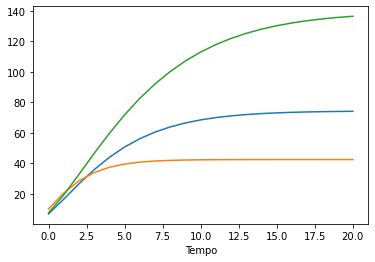

In [160]:
df2.Custo_esperado.plot()
df2.Custo_esperado_c_maior.plot()
df2.Custo_esperado_v_maior.plot();

[]

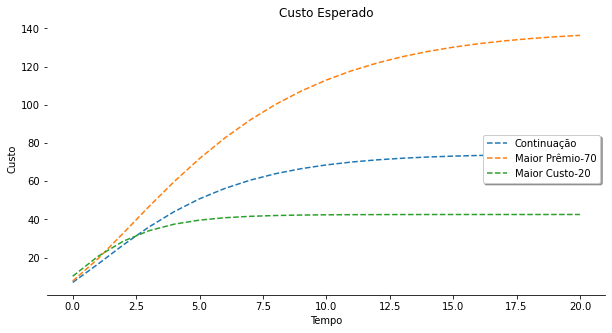

In [161]:
#####Figuras #####
fig,ax = plt.subplots(1,1, figsize=(10,5))
sns.despine(left=True)


ax.plot(df2.Custo_esperado, ls='--' )
ax.plot(df2.Custo_esperado_v_maior, ls='--' )

ax.plot(df2.Custo_esperado_c_maior, ls='--' )


ax.legend(['Continuação','Maior Prêmio-70', 'Maior Custo-20'], loc='center right', shadow=True)
ax.set_ylabel('Custo')
ax.set_xlabel('Tempo')
ax.set_title('Custo Esperado')
plt.plot()

In [265]:
war=np.array([[-c, v],[0,0]])   ##equilíbrio misto



In [266]:
game = nash.Game(war, war.transpose())
list(game.support_enumeration())

[(array([1., 0.]), array([0., 1.])),
 (array([0., 1.]), array([1., 0.])),
 (array([0.83333333, 0.16666667]), array([0.83333333, 0.16666667]))]

In [267]:
t=np.linspace(0,1000,100)
print(t)

[   0.           10.1010101    20.2020202    30.3030303    40.4040404
   50.50505051   60.60606061   70.70707071   80.80808081   90.90909091
  101.01010101  111.11111111  121.21212121  131.31313131  141.41414141
  151.51515152  161.61616162  171.71717172  181.81818182  191.91919192
  202.02020202  212.12121212  222.22222222  232.32323232  242.42424242
  252.52525253  262.62626263  272.72727273  282.82828283  292.92929293
  303.03030303  313.13131313  323.23232323  333.33333333  343.43434343
  353.53535354  363.63636364  373.73737374  383.83838384  393.93939394
  404.04040404  414.14141414  424.24242424  434.34343434  444.44444444
  454.54545455  464.64646465  474.74747475  484.84848485  494.94949495
  505.05050505  515.15151515  525.25252525  535.35353535  545.45454545
  555.55555556  565.65656566  575.75757576  585.85858586  595.95959596
  606.06060606  616.16161616  626.26262626  636.36363636  646.46464646
  656.56565657  666.66666667  676.76767677  686.86868687  696.96969697
  707.0

In [268]:
apsilon = 10 ** -1
xs= odeint(func= dx, y0=[1-epsilon, epsilon], t=t, args=(war,)) # criar todos os x em relação ao tempo  y0=onde a população começa

[]

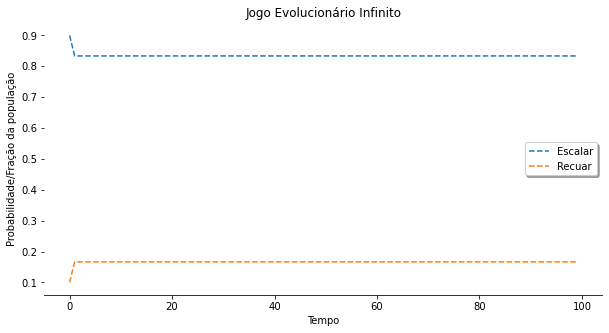

In [269]:
#####Figuras #####
fig,ax = plt.subplots(1,1, figsize=(10,5))
sns.despine(left=True)


ax.plot(xs, ls='--' )


ax.legend(['Escalar','Recuar'], loc='center right', shadow=True)
ax.set_ylabel('Probabilidade/Fração da população')
ax.set_xlabel('Tempo')
ax.set_title('Jogo Evolucionário Infinito')
plt.plot()

In [214]:
war=np.array([[-2*c, v-c],[-c,-c]])  
#W=np.array([[v-c, v],[0,0]])   ##equilíbrio E-R
#Z=np.array([[-c, 0],[v,0]])

In [256]:
X = np.arange(0, 1.01, .01)
Y = np.arange(0, 1.01, .01)
#U, V = np.meshgrid(X, Y)

In [257]:
game = nash.Game(war,war.transpose())
#game = nash.Game(W,Z)
list(game.support_enumeration())

[(array([1., 0.]), array([0., 1.])),
 (array([0., 1.]), array([1., 0.])),
 (array([0.83333333, 0.16666667]), array([0.83333333, 0.16666667]))]

In [258]:
U=np.zeros((len(X),len(Y)))
V=np.zeros((len(X),len(Y)))

for j in range(len(Y)):
    for i in range(len(X)):
        #U[i,j]=dxdy([X[i],Y[j]],10, W,Z)[0]
        #V[i,j]=dxdy([X[i],Y[j]],10, W,Z)[1]
        U[i,j]=dxdy([X[i],Y[j]],10, war,war.transpose())[0]
        V[i,j]=dxdy([X[i],Y[j]],10, war,war.transpose())[1]
        


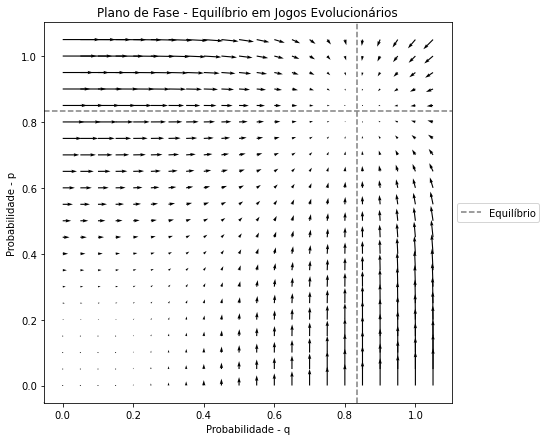

In [229]:
fig, ax = plt.subplots(figsize=(7.3,7))
q = ax.quiver(X, Y, U,V)
ax.quiverkey(q, X=0, Y=0, U=0,label='', labelpos='E')
ax.axvline(0.83333333,linestyle='--', color='grey')
ax.axhline(0.83333333,linestyle='--', color='grey')
ax.set_title('Plano de Fase - Equilíbrio em Jogos Evolucionários')
ax.set_xlabel('Probabilidade - q')
ax.set_ylabel('Probabilidade - p')
ax.legend(['Equilíbrio',],loc='center left', bbox_to_anchor=(1, 0.5))


plt.show()

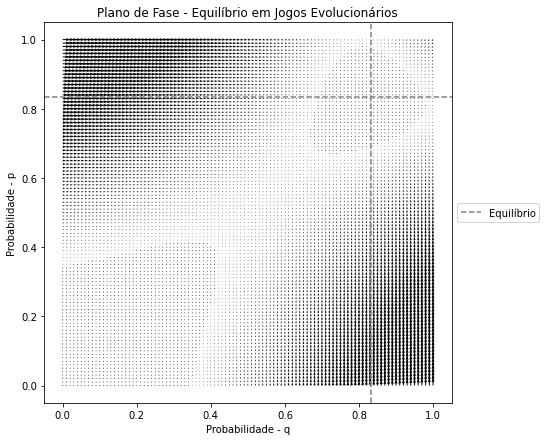

In [259]:
fig, ax = plt.subplots(figsize=(7.3,7))
q = ax.quiver(X, Y, U,V)
ax.quiverkey(q, X=0, Y=0, U=0,label='', labelpos='E')
ax.axvline(0.83333333,linestyle='--', color='grey')
ax.axhline(0.83333333,linestyle='--', color='grey')
ax.set_title('Plano de Fase - Equilíbrio em Jogos Evolucionários')
ax.set_xlabel('Probabilidade - q')
ax.set_ylabel('Probabilidade - p')
ax.legend(['Equilíbrio',],loc='center left', bbox_to_anchor=(1, 0.5))


plt.show()